In [10]:
a = np.array([1,2,3,4])

In [13]:
np.minimum(a,2)

array([1, 2, 2, 2])

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import src.graph_utils as gutils
import src.utils as utils
import os

In [9]:
gutils.generate_nx_graph("small-worlds", f"example_graphs/smallworlds-small.csv", n=500, m=1000, rewire_probability=0.07)


In [76]:
initial_cure = 2
cure_index_list = []
for i in range(3):
    gutils.generate_nx_graph("binomial", f"binomial-large.csv", n=10000, m=50000)
    g = gutils.load_graph(f"binomial-{i}.csv")
    degrees = np.sum(g + g.T, axis = 1)
    cure_indices = np.argpartition(degrees,-initial_cure)[-initial_cure:]
    cure_index_list.append(cure_indices)

In [77]:
cure_index_list

[array([1277, 2510]), array([4180, 3264]), array([3451, 2261])]

# Random Cure

In [88]:
binomial = {"ti":[],"ri":[],"tc":[],"rc":[]}
small_worlds = {"ti":[],"ri":[],"tc":[],"rc":[]}
scale_free = {"ti":[],"ri":[],"tc":[],"rc":[]}
results = {"binomial":binomial,"scale-free":scale_free, "small-worlds":small_worlds}

folder_suffices = ["bn","sf","sw"]
edges = [20000, 19984,20000]

for i in range(3):
    
    exp_name = f"Spread:mi-ms,Size:5000-{edges[i]},pi:0.03,pc:0.03,init_inf:2, init_cure:2, nsims:2"
    parent_dir = f"src/results/random_cure_{folder_suffices[i]}/"
    key = list(results.keys())[i]
    for file in os.listdir(parent_dir):
#         print(file)
        if "%" in file and file.split("%")[0] == exp_name:
            results[key]["ti"].append(utils.load_obj(parent_dir+file, "total_infection"))
            results[key]["ri"].append(utils.load_obj(parent_dir+file, "roundly_infection"))
            results[key]["tc"].append(utils.load_obj(parent_dir+file, "total_cured"))
            results[key]["rc"].append(utils.load_obj(parent_dir+file, "roundly_cured"))
            
random_results = results

In [79]:
binomial = {"ti":[],"ri":[],"tc":[],"rc":[]}
small_worlds = {"ti":[],"ri":[],"tc":[],"rc":[]}
scale_free = {"ti":[],"ri":[],"tc":[],"rc":[]}
results = {"binomial":binomial,"scale-free":scale_free, "small-worlds":small_worlds}
folder_suffices = ["bn","sf","sw"]
edges = [20000, 19984,20000]
ginits_list = [[[1277, 2510],[4180, 3264], [3451, 2261]],
               [[11,7], [5,7], [4,5]],
              [[2086, 2934],[3073, 3436],[4843, 4399]]]


for i in range(3):
    parent_dir = f"src/results/smart_cure_{folder_suffices[i]}/"
    key = list(results.keys())[i]
    print(key)

    for ginit in ginits_list[i]:
        exp_name = f"Spread:mi-ms,Size:5000-{edges[i]},pi:0.03,pc:0.03,init_inf:2, init_cure:{ginit}, nsims:2"

        for file in os.listdir(parent_dir):
            if "%" in file and file.split("%")[0] == exp_name:
                results[key]["ti"].append(utils.load_obj(parent_dir+file, "total_infection"))
                results[key]["ri"].append(utils.load_obj(parent_dir+file, "roundly_infection"))
                results[key]["tc"].append(utils.load_obj(parent_dir+file, "total_cured"))
                results[key]["rc"].append(utils.load_obj(parent_dir+file, "roundly_cured"))
smart_results = results

binomial
scale-free
small-worlds


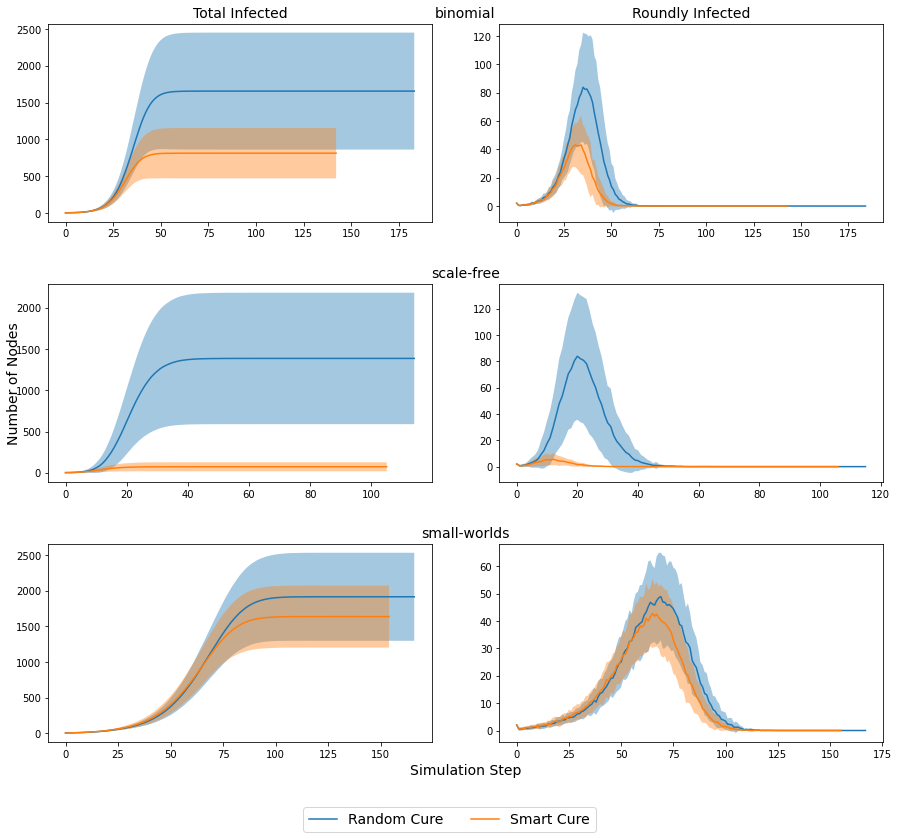

In [100]:
fig, axs = plt.subplots(3,2, figsize=(14,12))

for t,tplg in enumerate(list(results.keys())):

    ax = axs[t][0]
    res = [np.mean(utils.padded_stack(grun), axis=0) for grun in random_results[tplg]["ti"]]
    mean = np.mean(utils.padded_stack(res), axis=0)
    std =  np.std(utils.padded_stack(res), axis=0)
    ax.plot(mean, label="Random Cure")      
    ax.fill_between(range(mean.shape[0]), mean-std, mean+std, alpha=0.4)

    res = [np.mean(utils.padded_stack(grun), axis=0) for grun in smart_results[tplg]["ti"]]
    mean = np.mean(utils.padded_stack(res), axis=0)
    std =  np.std(utils.padded_stack(res), axis=0)
    ax.plot(mean, label="Smart Cure")      
    ax.fill_between(range(mean.shape[0]), mean-std, mean+std, alpha=0.4) 
#     ax.set_title("Total Infection")
#     ax.set_ylabel("Number of Nodes",size=14)
#     ax.legend()
    
    ax = axs[t][1]
    
    res = [np.mean(utils.padded_stack(grun), axis=0) for grun in random_results[tplg]["ri"]]
    mean = np.mean(utils.padded_stack(res), axis=0)
    std =  np.std(utils.padded_stack(res), axis=0)
    ax.plot(mean, label="Random Cure")      
    ax.fill_between(range(mean.shape[0]), mean-std, mean+std, alpha=0.4)

    res = [np.mean(utils.padded_stack(grun), axis=0) for grun in smart_results[tplg]["ri"]]
    mean = np.mean(utils.padded_stack(res), axis=0)
    std =  np.std(utils.padded_stack(res), axis=0)
    ax.plot(mean, label="Smart Cure")      
    ax.fill_between(range(mean.shape[0]), mean-std, mean+std, alpha=0.4)
#     ax.set_title("Roundly Infection")
#     ax.legend()
    fig.add_subplot(int(f"31{t+1}"), frameon=False)    
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.title(tplg, size=14)

fig.legend(["Random Cure", "Smart Cure"], loc='lower center', ncol=2, fontsize =14) 

fig.add_subplot(121, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.title("Total Infected", size=14)

fig.add_subplot(122, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.title("Roundly Infected", size=14)
    
    
fig.add_subplot(111, frameon=False)    
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

plt.xlabel("Simulation Step", size=14)
plt.ylabel("Number of Nodes",  size=14)


plt.tight_layout()


plt.savefig("img/smartcure-randomcure.pdf", format="pdf")      
